In [20]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print('Máy tính đang xử lí ảnh....')
from os import listdir
from numpy import asarray

folder = '/content/drive/MyDrive/nhandienvantay/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('as'):
    output = 0
  if file.startswith('cw'):
    output = 1
  if file.startswith('l'):
    output = 2
  if file.startswith('wa'):
    output = 3
  if file.startswith('ws'):
    output = 4
  
  photo = load_img(folder + file, target_size=(224,224))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

# Save image data and labels to numpy arrays
save('/content/drive/MyDrive/nhandienvantay/Fingerprint_photos.npy', photos)
save('/content/drive/MyDrive/nhandienvantay/Fingerprint_labels.npy', labels)

Máy tính đang xử lí ảnh....
(50, 224, 224, 3) (50,)


In [15]:
import numpy as np

# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/nhandienhoa/Flowers_photos.npy')
labels = np.load('/content/drive/MyDrive/nhandienhoa/Flowers_labels.npy')
labels_one_hot = to_categorical(labels)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [21]:
#Build model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import ReLU
from keras.optimizers import Adam
from keras.optimizers import RMSprop

classes = 5

model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape= (224,224, 3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 56, 56, 128)      

In [22]:
#increase data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [23]:
print('Máy tính đang training...')
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(aug.flow(x_train, y_train, batch_size=32),
                               epochs = 50)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)


Máy tính đang training...
Epoch 1/50
2/2 [==============================] - 13s 10s/step - loss: 2.3199 - accuracy: 0.1143
Epoch 2/50
2/2 [==============================] - 11s 9s/step - loss: 1.5971 - accuracy: 0.1143
Epoch 3/50
2/2 [==============================] - 11s 2s/step - loss: 1.6207 - accuracy: 0.1714
Epoch 4/50
2/2 [==============================] - 13s 1s/step - loss: 1.6015 - accuracy: 0.2571
Epoch 5/50
2/2 [==============================] - 11s 10s/step - loss: 1.5994 - accuracy: 0.2286
Epoch 6/50
2/2 [==============================] - 9s 7s/step - loss: 1.8745 - accuracy: 0.2286
Epoch 7/50
2/2 [==============================] - 10s 1s/step - loss: 1.6543 - accuracy: 0.2286
Epoch 8/50
2/2 [==============================] - 11s 1s/step - loss: 1.5947 - accuracy: 0.2286
Epoch 9/50
2/2 [==============================] - 9s 7s/step - loss: 1.5760 - accuracy: 0.2286
Epoch 10/50
2/2 [==============================] - 10s 7s/step - loss: 1.6056 - accuracy: 0.2286
Epoch 11/50
2

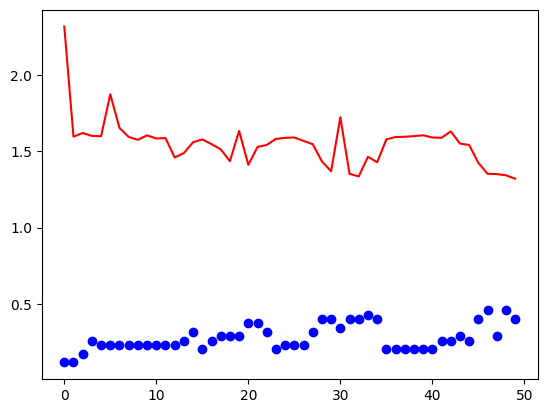

In [24]:
#Watching chart
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()


In [25]:
print('Máy tính đang training lần 2...')
train = model.fit(aug.flow(x_train, y_train, batch_size=32),
                               epochs = 30)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Máy tính đang training lần 2...
Epoch 1/30
2/2 [==============================] - 12s 1s/step - loss: 1.3689 - accuracy: 0.3429
Epoch 2/30
2/2 [==============================] - 10s 2s/step - loss: 1.4545 - accuracy: 0.3429
Epoch 3/30
2/2 [==============================] - 11s 1s/step - loss: 1.4507 - accuracy: 0.3429
Epoch 4/30
2/2 [==============================] - 10s 2s/step - loss: 1.4393 - accuracy: 0.3714
Epoch 5/30
2/2 [==============================] - 10s 1s/step - loss: 1.4060 - accuracy: 0.3429
Epoch 6/30
2/2 [==============================] - 12s 1s/step - loss: 1.3568 - accuracy: 0.3429
Epoch 7/30
2/2 [==============================] - 9s 8s/step - loss: 1.3900 - accuracy: 0.3714
Epoch 8/30
2/2 [==============================] - 10s 1s/step - loss: 1.3599 - accuracy: 0.4000
Epoch 9/30
2/2 [==============================] - 11s 1s/step - loss: 1.3869 - accuracy: 0.4000
Epoch 10/30
2/2 [==============================] - 9s 1s/step - loss: 1.4129 - accuracy: 0.4000
Epoch 11/

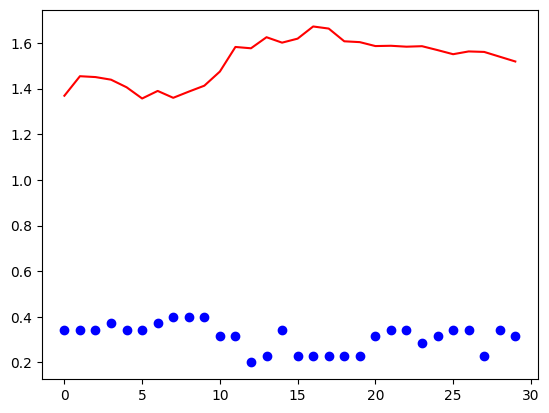

In [26]:
#Watching charts
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [27]:
print('Máy tính đang training lần 3....')
train = model.fit(aug.flow(x_train, y_train, batch_size=32),
                               epochs = 10)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Máy tính đang training lần 3....
Epoch 1/10
2/2 [==============================] - 11s 1s/step - loss: 1.5172 - accuracy: 0.3429
Epoch 2/10
2/2 [==============================] - 11s 1s/step - loss: 1.5116 - accuracy: 0.3714
Epoch 3/10
2/2 [==============================] - 11s 10s/step - loss: 1.4932 - accuracy: 0.3143
Epoch 4/10
2/2 [==============================] - 10s 2s/step - loss: 1.4614 - accuracy: 0.4000
Epoch 5/10
2/2 [==============================] - 12s 9s/step - loss: 1.3666 - accuracy: 0.4000
Epoch 6/10
2/2 [==============================] - 10s 9s/step - loss: 1.2856 - accuracy: 0.4286
Epoch 7/10
2/2 [==============================] - 11s 1s/step - loss: 1.3099 - accuracy: 0.4857
Epoch 8/10
2/2 [==============================] - 10s 2s/step - loss: 1.2109 - accuracy: 0.5143
Epoch 9/10
2/2 [==============================] - 14s 2s/step - loss: 1.1438 - accuracy: 0.6000
Epoch 10/10
1/1 [==============================] - 1s 962ms/step - loss: 59.9062 - accuracy: 0.4667
Ac

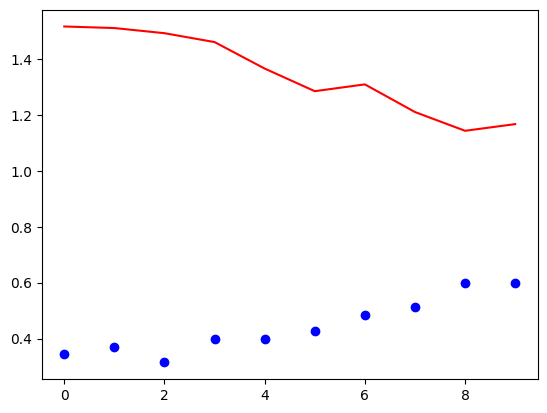

In [28]:
#Watching charts
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [29]:
model.save('/content/drive/MyDrive/nhandienvantay/Fingerprint.h5')

In [30]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/nhandienvantay/Fingerprint.h5')

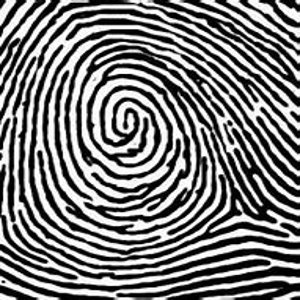

1/1 [==============================] - 0s 364ms/step
['Chủng vân tay của bạn là AS: là mẫu vân tay hiếm, trên thế giới chỉ có khoảng 4% dân số sở hữu nó. Chủ nhân của vân tay này có tiềm năng lớn trong học tập']


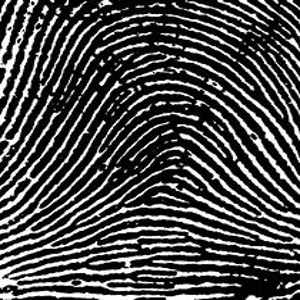

1/1 [==============================] - 0s 109ms/step
['Chủng vân tay của bạn là Spiral Whorl là người như những con Đại bàng dũng mạnh, quyết đoán hướng về phía trước.']


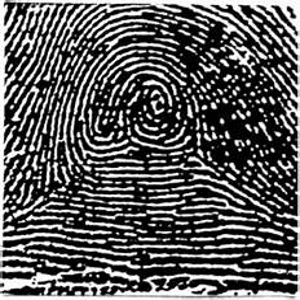

1/1 [==============================] - 0s 125ms/step
['Chủng vân tay của bạn là Spiral Whorl là người như những con Đại bàng dũng mạnh, quyết đoán hướng về phía trước.']


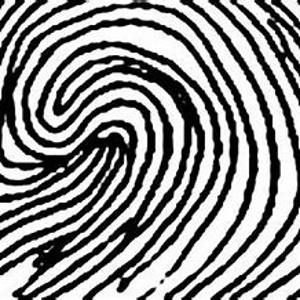

1/1 [==============================] - 0s 95ms/step
['Chủng vân tay của bạn là AS: là mẫu vân tay hiếm, trên thế giới chỉ có khoảng 4% dân số sở hữu nó. Chủ nhân của vân tay này có tiềm năng lớn trong học tập']


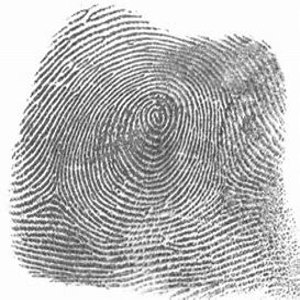

1/1 [==============================] - 0s 94ms/step
['Chủng vân tay của bạn là Spiral Whorl là người như những con Đại bàng dũng mạnh, quyết đoán hướng về phía trước.']


In [35]:
from PIL import Image
import numpy as np
import os

#Tạo mảng để chứa label
label = np.array(['Chủng vân tay của bạn là AS: là mẫu vân tay hiếm, trên thế giới chỉ có khoảng 4% dân số sở hữu nó. Chủ nhân của vân tay này có tiềm năng lớn trong học tập',
                  'Chủng vân tay của bạn là Loop: còn được biết đến với tên gọi là chủng vân tay nước, những người sở hữu chủng vân tay này đó chính là khả năng bắt chước vượt trội',
                  'Chủng vân tay của bạn là Whorl Composite: nằm trong nhóm vân tay đại bàng, những người sở hữu chủng vân tay này thì nhanh nhẹn, mạnh mẽ, khôn ngoan, táo bạo, liều lĩnh',
                  'Chủng vân tay của bạn là Spiral Whorl là người như những con Đại bàng dũng mạnh, quyết đoán hướng về phía trước.',
                  'Chủng vân tay của bạn là Accidental Whorl là những người luôn có những suy nghĩ vượt ra khỏi khuôn khổ xã hội ,không thích cuộc sống đơn điệu, tẻ nhạt mà luôn tìm tòi, khám phá những chân trời mới.'])


# Kích thước mới của ảnh
new_size = (300, 300)
predict_size = (224, 224)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/nhandienvantay/checking data fingerprint'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,224,224,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])